In [1]:
# imports
%load_ext autoreload
%autoreload 2
import time
from timeit import default_timer as timer
from victor_thesis_experiments import *
from victor_thesis_utils import *
from victor_thesis_landscapes import *
from victor_thesis_plots import *
from victor_thesis_metrics import *
from concurrent.futures import ProcessPoolExecutor
from multiprocessing import cpu_count

starting
done


In [38]:
# test experiment single run
from vic_tests import process_and_store_metrics
from qnns.cuda_qnn import CudaPennylane
num_qubits = 1
fake_landscapes=[]
for i in range(5):
    qnn = CudaPennylane(num_wires=num_qubits, num_layers=1, device='cpu')
    random_unitary = torch.tensor(np.array(random_unitary_matrix(num_qubits)), dtype=torch.complex128, device="cpu")
    non_entangled_inputs = generate_random_datapoints(1, num_qubits, random_unitary)
    ls_tmp, _ =generate_loss_landscape(15, 3 , non_entangled_inputs, random_unitary, qnn)
    fake_landscapes.append(ls_tmp)
process_and_store_metrics(fake_landscapes, 1, "test")
fake_landscapes=[]
for i in range(5):
    qnn = CudaPennylane(num_wires=num_qubits, num_layers=1, device='cpu')
    random_unitary = torch.tensor(np.array(random_unitary_matrix(num_qubits)), dtype=torch.complex128, device="cpu")
    entangled_inputs = generate_random_datapoints(1, 2, random_unitary)
    ls_tmp, _ =generate_loss_landscape(15, 3 , non_entangled_inputs, random_unitary, qnn)
    fake_landscapes.append(ls_tmp)
process_and_store_metrics(fake_landscapes, 2, "test")
data_batch=[]    
unitaries = []
# for _ in range(1,6,1):    
#     # generate array of training data configurations [type_of_data][num_data_points][deg_of_entanglement][id_unitary][id_try]
#     data_points = generate_random_datapoints(1, 1, random_unitary_matrix(1))
#     unitaries.append(torch.tensor(np.array(random_unitary_matrix(1)), dtype=torch.complex128, device="cpu"))
#     data_batch.append(data_points)
# landscapes= []
# qnn = UnitaryParametrization(num_wires=1, num_layers=2, device='cpu')
# for idx in range(len(data_batch)):
#     data_set = data_batch[idx]
#     U = unitaries[idx]
#     landscapes.append(generate_loss_landscape(3, 6, data_set, U, qnn))
# process_and_store_metrics(landscapes, 1, "test")

processing
processing


In [4]:
import time
from datetime import datetime
from timeit import default_timer as timer
from qnns.cuda_qnn import UnitaryParametrization
#from victor_thesis_experiments import *
from victor_thesis_utils import *
from victor_thesis_landscapes import *
from victor_thesis_plots import *
from victor_thesis_metrics import *
from concurrent.futures import ProcessPoolExecutor
from multiprocessing import cpu_count

# full experiment framework

#todo
def process_and_store_metrics(landscapes, conf_id):
    #calculates and stores the raw metrics, the standard deviations and medians of the metrics and have config id in name of file to match to configs.txt
    #gets 5 landscapes as input
    #conf_id
    #run_1
    #TV=...
    #...
    #run_5
    #...
    #run_avg
    #TV=...
    #...
    #run_stdv
    #TV=...
    #...
    return 0

#todo
def store_configs_to_file(unitaries, configurations):
    #write down all run configurations in a file with the run_ids
    #-
    #conf_id=16
    #data_type=orthogonal
    #num_data_points=3
    #deg_entanglement=2
    #unitary=[[a,b],[c,d]] (rough form)
    #data_batch_1=[[...]]
    #...
    #data_batch_5=[[...]]
    return 0

#todo
def generate_data_points(type_of_data, entanglement, num_data_points):
    return type_of_data*entanglement*num_data_points

# one asynchronous run will calculate 5 landscapes and their metrics
def run_single_experiment(grid_size, dimensions, data_batch, U, qnn, conf_id):
    #data batch contains 5 datapoint-sets, as we do 5 runs per unitary and then average etc.
    landscapes= []
    # for data_set in data_batch:
    #     landscapes.append(generate_loss_landscape(grid_size, dimensions, data_set, U, qnn))
    # process_and_store_metrics(landscapes, conf_id)
    now = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(f"[{now}] Finished run: {conf_id}")

def run_full_experiment(num_qubits, num_unitaries = 5, num_tries = 5):
    # generate general qnn (?)
    qnn = UnitaryParametrization(num_wires=num_qubits, num_layers=1, device='cpu')
    grid_size = 2
    dimensions = 2
    unitaries = []
    #[id_unitary][id_try][type_of_data][deg_of_entanglement][num_data_points]
    configurations = []
    for _ in range(num_unitaries):
        #generate a random unitary with num_qubits qubits (why are they the same?)
        unitaries.append(torch.tensor(np.array(random_unitary_matrix(num_qubits)), dtype=torch.complex128, device="cpu"))

    
    start = time.time()
    # generate configurations (5 datapoint sets = 5 runs per config)
    conf_id = 0    
    with ProcessPoolExecutor(cpu_count()) as exe:        
        # iterate over  type of training data: 1=random, 2=orthogonal, 3=linearly dependent in H_x, 4= variable schmidt rank
        for type_of_data in range(1,5,1):   
            num_data_points_row = []
            # iterate over degree of entanglement 1 to 4
            for num_data_points in range(1,5,1):
                deg_of_entanglement_row = []
                # iterate over training data size 1 to 4
                for deg_of_entanglement in range(1,5,1):
                    # iterate over unitaries
                    unitary_row = []
                    for unitary in unitaries:       
                        data_batch_for_unitary = []
                        #iterate over number of tries/runs
                        for _ in range(1,num_tries+1,1):
                            # generate array of training data configurations [type_of_data][num_data_points][deg_of_entanglement][id_unitary][id_try]
                            data_points = generate_data_points(type_of_data, deg_of_entanglement, num_data_points)
                            data_batch_for_unitary.append(data_points)
                        # run this per configuration unitary (5 sets of data -> take average and stdv...)
                        exe.submit(run_single_experiment,grid_size, dimensions, data_batch_for_unitary, unitary, qnn, conf_id)                 
                        conf_id += 1
                        unitary_row.append(data_batch_for_unitary)                    
                    deg_of_entanglement_row.append(unitary_row)
                num_data_points_row.append(deg_of_entanglement_row)
            configurations.append(num_data_points_row)

    configurations = np.array(configurations)
    print(configurations.shape)  
    store_configs_to_file(unitaries, configurations)    
    end = time.time()
    print(f"total runtime: {np.round(end-start,2)}s")
if __name__ == '__main__':
    run_full_experiment(2)

In [7]:
# test unitary parametrization
from qnns.cuda_qnn import CudaPennylane

torch.set_num_threads(1)
torch.multiprocessing.set_sharing_strategy('file_system')

num_qubits = 1
qnn = CudaPennylane(num_wires=num_qubits, num_layers=2, device='cpu')
random_unitary = torch.tensor(np.array(random_unitary_matrix(num_qubits)), dtype=torch.complex128, device="cpu")
print("tensor V",qnn.get_tensor_V())
print("params",qnn.params)
print("unitary",random_unitary)
non_entangled_inputs = generate_random_datapoints(3, num_qubits, random_unitary)
non_entangled_landscape, _= generate_loss_landscape(3, 6 , non_entangled_inputs, random_unitary, qnn) 

tensor V tensor([[ 0.9749-0.0009j,  0.2160+0.0536j],
        [-0.2187-0.0411j,  0.8863+0.4062j]], dtype=torch.complex128,
       grad_fn=<MmBackward0>)
params tensor([[[-0.0274,  0.2199, -0.0391],
         [-0.4226,  0.1677,  0.0804]]], dtype=torch.float64,
       requires_grad=True)
unitary tensor([[ 0.0321-0.8046j, -0.5909-0.0492j],
        [-0.3464+0.4813j, -0.6327-0.4981j]], dtype=torch.complex128)
tensor([[ 0.0321-0.8046j, -0.5909-0.0492j],
        [-0.3464+0.4813j, -0.6327-0.4981j]], dtype=torch.complex128)
tensor([[[-0.2334+0.0540j],
         [-0.6377-0.7321j]],

        [[ 0.2529+0.9055j],
         [-0.1791-0.2900j]],

        [[-0.4095-0.1227j],
         [-0.7896+0.4402j]]], dtype=torch.complex128)


In [ ]:
# test n-dim landscape generation
def test_ndim_landscapes():
    # hadamard U2
    qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
    unitary = torch.tensor(np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu")
    ############
    # phase R
    # qnn = get_qnn("CudaR", list(range(1)), 1, device="cpu")
    # unitary = torch.tensor(np.array([[1, 0], [0, 1j]]), dtype=torch.complex128, device="cpu")
    ############
    num_ticks = 100
    data_points = 20
    # generate data points
    non_entangled_inputs = generate_random_datapoints(data_points, 1, unitary)
    # print("starting small tests")
    # # actual 3d qnn vs 2d qnn with same tick number
    # n_2d_ticks = 353
    # start = timer()
    # loss_nd, _ = generate_loss_landscape(n_2d_ticks,2, non_entangled_inputs, unitary, qnn)
    # end = timer() 
    # print(f"2d gen with* {n_2d_ticks**2} points: {np.round(end-start,3)}s")

    # qnn = get_qnn("CudaPennylane", list(range(1)), 1, device="cpu")
    # n_3d_ticks = 50
    # start = timer()
    # loss_nd, _ = generate_loss_landscape(n_3d_ticks,3, non_entangled_inputs, unitary, qnn)
    # end = timer() 
    # print(f"3d gen with {n_3d_ticks**3} points: {np.round(end-start,3)}s")

    # multi dim and tick tests
    qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
    print("starting full tests")
    dimensions_tests = [2, 3, 4, 5, 6, 7, 8, 9]
    num_ticks_tests = [3, 5, 7, 10, 15, 20]
    for dimensions in dimensions_tests:
        print(f"{dimensions} PARAMS")
        for ticks in num_ticks_tests:    
            start = timer()
            landscape, _= generate_loss_landscape(ticks,dimensions, non_entangled_inputs, unitary, qnn)    
            end = timer()        
            print(f"time for landscape generation with {dimensions} params and {ticks} ticks ({ticks**dimensions} points): {np.round(end-start,3)}s")
            start = timer()
            calc_scalar_curvature(landscape)  
            end = timer()        
            print(f"time for scalar curvature calculation: {np.round(end-start,3)}s")
            start = timer()
            calc_total_variation(landscape)  
            calc_IGSD(landscape)
            calc_fourier_density(landscape) 
            end = timer()        
            print(f"time for all other metrics: {np.round(end-start,3)}s")
            print("-----")
        print("##############################################################################")
        print("##############################################################################")
        print("##############################################################################")
    #test 3d stuff
test_ndim_landscapes()

In [ ]:
# n-dim tests
def n_dim_tests(
):
    qnn = get_qnn("CudaPennylane", list(range(1)), 1, device="cpu")
    unitary = torch.tensor(
        np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
    )
    num_ticks = 12
    # generate data points
    non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
    entangled_inputs = generate_random_datapoints(5, 2, unitary)
    z_o_inputs = get_zero_one_datapoints()
    # get 3d landscapes
    loss_z_o_3d= generate_3D_loss_landscape(
        num_ticks, z_o_inputs, unitary
    )
    loss_non_ent_3d= generate_3D_loss_landscape(
        num_ticks, non_entangled_inputs, unitary
    )
    loss_ent_3d= generate_3D_loss_landscape(
        num_ticks, entangled_inputs, unitary
    )
    landscapes = [loss_z_o_3d, loss_non_ent_3d, loss_ent_3d]
    #test total variation
    print(
        "TOTAL VARIATION: ",
        calc_total_variation(landscapes[0]),
        calc_total_variation(landscapes[1]),
        calc_total_variation(landscapes[2]),
    )
    #test igsd
    for landscape in landscapes:
        igsd = calc_IGSD(landscape)
        count = 1
        for sd in igsd:
            print(f"IGSD (dir {count}): {sd}")
            count +=1
        print("---------")
    #test fourier stuff
    print("fourier densities:")
    print(calc_fourier_density(landscapes[0]))
    print(calc_fourier_density(landscapes[1]))
    print(calc_fourier_density(landscapes[2]))

    #test scalar curvature
    print("---------")
    print("Scalar curvature absolute sums: ")
    for landscape in landscapes:
        print(np.sum(np.absolute(calc_scalar_curvature(landscape))))
    
n_dim_tests()

In [10]:
# n-dim tests 2d
qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
unitary = torch.tensor(
    np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu"
)
num_ticks = 12
# generate data points
non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
entangled_inputs = generate_random_datapoints(5, 2, unitary)
z_o_inputs = get_zero_one_datapoints()
# get 3d landscapes
loss_z_o_3d= generate_2d_loss_landscape(
    num_ticks, z_o_inputs, unitary, qnn
)
loss_non_ent_3d= generate_2d_loss_landscape(
    num_ticks, non_entangled_inputs, unitary, qnn
)
loss_ent_3d= generate_2d_loss_landscape(
    num_ticks, entangled_inputs, unitary, qnn
)
landscapes = [loss_z_o_3d, loss_non_ent_3d, loss_ent_3d]
#test scalar curvature
# print(get_scalar_curvature(landscapes[0]))
# get_scalar_curvature(landscapes[1])
# get_scalar_curvature(landscapes[2])
#test total variation
print(
    "TOTAL VARIATION: ",
    calc_total_variation(landscapes[0]),
    calc_total_variation(landscapes[1]),
    calc_total_variation(landscapes[2]),
)
#test igsd
for landscape in landscapes:
    igsd = calc_IGSD(landscape)
    count = 1
    for sd in igsd:
        print(f"IGSD (dir {count}): {sd}")
        count +=1
    print("---------")
#test fourier stuff
print("fourier stuff")
fourier_landscape_z_o = get_fourier_landscape(z_o_inputs, unitary, qnn)
fourier_landscape_non_entangled = get_fourier_landscape(non_entangled_inputs, unitary, qnn)
fourier_landscape_entangled = get_fourier_landscape(entangled_inputs, unitary, qnn)
print(calc_fourier_density(landscapes[0]))
print(calc_fourier_density(landscapes[1]))
print(calc_fourier_density(landscapes[2]))
print("2nd function")
print(calculate_fourier_density(landscapes[0]))
print(calculate_fourier_density(landscapes[1]))
print(calculate_fourier_density(landscapes[2]))
#test scalar curvature
for landscape in landscapes:
    print("SC: ",np.sum(np.absolute(calc_scalar_curvature(landscape))))

TOTAL VARIATION:  23.89 17.47 23.49
IGSD (dir 1): 5.5
IGSD (dir 2): 1.3961166419268136e+16
---------
IGSD (dir 1): 10.8
IGSD (dir 2): 16.06
---------
IGSD (dir 1): 9.08
IGSD (dir 2): 9.13
---------
fourier stuff
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 2.955
FD lib with semi custom norms: 2.955
FD lib with full custom norms: 2.955
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 1.886
FD lib with semi custom norms: 3.991
FD lib with full custom norms: 3.812
different versions of calculating fourier density - not sure which one is the correct one?
FD lib with np linalg norms: 1.71
FD lib with semi custom norms: 3.989
FD lib with full custom norms: 3.823
2.666667
3.504714
3.517214
2nd function
2.6666666666666705
3.5047144625846074
3.51721404273395
SC:  5.751351433298072e-16
SC:  0.27856475218931376
SC:  0.4689360809757129


data
tensor([[ 0.4768+0.3299j,  0.4272-0.6938j],
        [-0.4005-0.3235j, -0.7256+0.4566j],
        [-0.8071-0.4199j,  0.3877+0.1480j],
        [-0.2584+0.0648j, -0.3087-0.9131j],
        [ 0.6363-0.2828j, -0.0777-0.7135j]], dtype=torch.complex128)
tensor([[[ 0.4768+0.3299j],
         [ 0.4272-0.6938j]],

        [[-0.4005-0.3235j],
         [-0.7256+0.4566j]],

        [[-0.8071-0.4199j],
         [ 0.3877+0.1480j]],

        [[-0.2584+0.0648j],
         [-0.3087-0.9131j]],

        [[ 0.6363-0.2828j],
         [-0.0777-0.7135j]]], dtype=torch.complex128)
data
tensor([[-0.1074+0.3767j,  0.3247+0.6310j, -0.1299+0.4871j, -0.0660-0.2905j],
        [ 0.1977-0.4246j, -0.1438-0.8089j, -0.1388+0.1270j, -0.1647-0.2074j],
        [-0.1977+0.0044j, -0.2775-0.4938j, -0.3406-0.7235j, -0.0039-0.0251j],
        [-0.4220+0.0668j,  0.1758-0.5281j,  0.0982-0.1582j,  0.5322+0.4356j],
        [-0.2526+0.0838j, -0.5243+0.2397j,  0.1256+0.2106j,  0.6688-0.2991j]],
       dtype=torch.complex128)
tensor([[

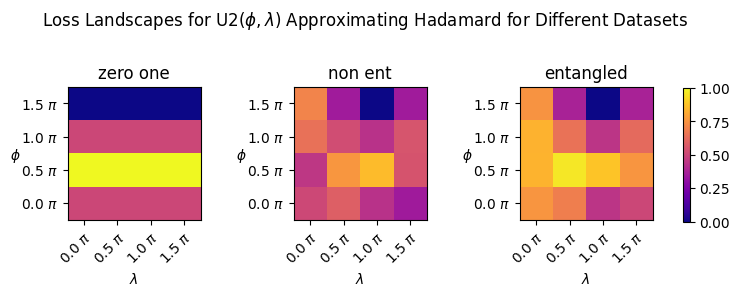

real values


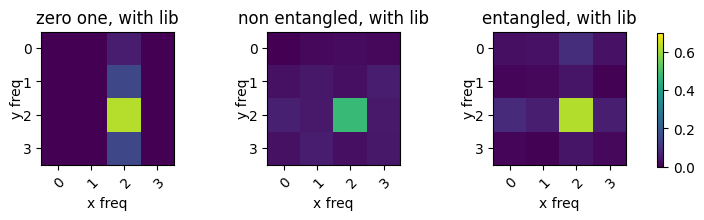

absolute sum:  3.1274404136366187


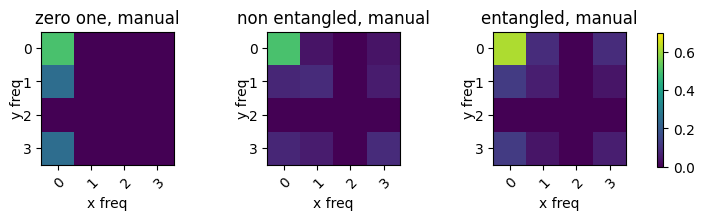

absolute sum:  3.2292239168159025
imaginary values


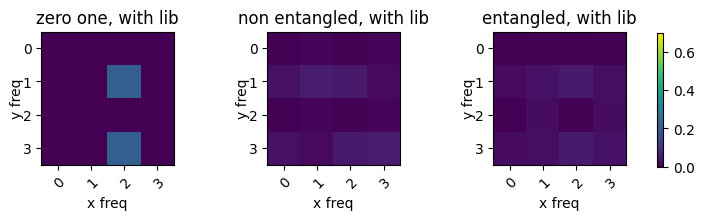

absolute sum:  1.094382840399761


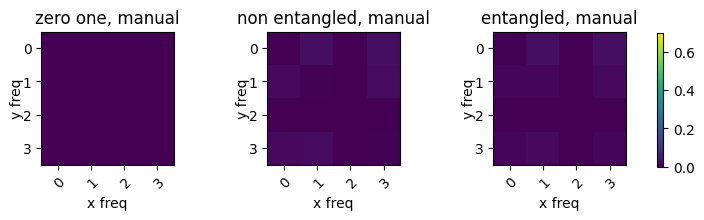

absolute sum:  0.2636326856324346
sum of real and imaginary values


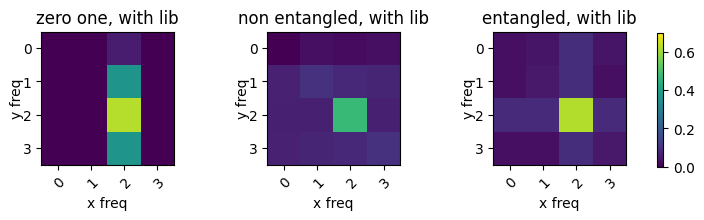

absolute sum:  4.22182325403638


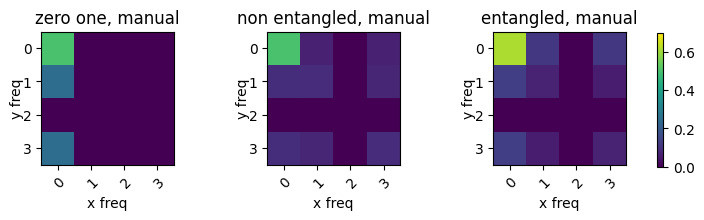

absolute sum:  3.492856602448337


In [9]:
# fourier testing

# hadamard U2
qnn = get_qnn("CudaU2", list(range(1)), 1, device="cpu")
unitary = torch.tensor(np.array([[1, 1], [1, -1]]) / np.sqrt(2), dtype=torch.complex128, device="cpu")
############
# phase R
# qnn = get_qnn("CudaR", list(range(1)), 1, device="cpu")
# unitary = torch.tensor(np.array([[1, 0], [0, 1j]]), dtype=torch.complex128, device="cpu")
############
num_ticks = 4
# generate data points
non_entangled_inputs = generate_random_datapoints(5, 1, unitary)
entangled_inputs = generate_random_datapoints(5, 2, unitary)
z_o_inputs = get_zero_one_datapoints()
# get 2d landscapes
loss_z_o= generate_2d_loss_landscape(
    num_ticks, z_o_inputs, unitary, qnn
)
loss_non_ent= generate_2d_loss_landscape(
    num_ticks, non_entangled_inputs, unitary, qnn
)
loss_ent= generate_2d_loss_landscape(
    num_ticks, entangled_inputs, unitary, qnn
)
landscapes = [loss_z_o, loss_non_ent, loss_ent]

#test fourier stuff
print("fourier stuff")
fourier_landscape_z_o = get_fourier_landscape(z_o_inputs, unitary, qnn,num_ticks).values
z_o_fd, z_o_f_plot = calc_fourier_density(landscapes[0])
print("FD manual custom:", z_o_fd)
fourier_landscape_non_entangled = get_fourier_landscape(non_entangled_inputs, unitary, qnn,num_ticks).values
n_e_fd, non_ent_f_plot = calc_fourier_density(landscapes[1])
print("FD manual custom:", n_e_fd)
fourier_landscape_entangled = get_fourier_landscape(entangled_inputs, unitary, qnn,num_ticks).values
e_fd, ent_f_plot = calc_fourier_density(landscapes[2])
print("FD manual custom:", e_fd)

# differences possibly explained by different loss landscape sampling
plot_row(landscapes, ["zero one", "non ent","entangled"], "Hadamard", "U2", mode="default")
print("real values")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).real), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).real)))

print("imaginary values")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).imag), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).imag)))

print("sum of real and imaginary values")
plot_fourier_row(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)+np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real), ["zero one, with lib", "non entangled, with lib","entangled, with lib"])
print("absolute sum: ", np.sum(np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).imag)+np.absolute(np.array([fourier_landscape_z_o, fourier_landscape_non_entangled, fourier_landscape_entangled]).real)))
plot_fourier_row(np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).imag)+np.absolute(np.array([z_o_f_plot, non_ent_f_plot, ent_f_plot]).real), ["zero one, manual", "non entangled, manual","entangled, manual"])
print("absolute sum: ", np.sum(np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).imag)+np.absolute(np.array([[z_o_f_plot, non_ent_f_plot, ent_f_plot]]).real)))
# print(calc_fourier_density(landscapes[0]))
# print(calc_fourier_density(landscapes[1]))
# print(calc_fourier_density(landscapes[2]))


In [ ]:
# EXP on Hadamard
run_hadamard()

In [ ]:
# EXP on Pauli-X
run_pauli_x()

In [ ]:
# EXP on Pauli-Y
run_pauli_y()

In [ ]:
# EXP on Pauli-Z
run_pauli_z()

In [ ]:
# EXP on Phase (S)
run_phase_s()